In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [2]:
# Load the dataset
file_path = 'C:\\Users\\Nirusan03\\PycharmProjects\\FYP_POC\\Final_Dataset.csv'  # Replace with the actual file path
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
dataset.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,-0.537140,-0.121257,-0.140415,-0.093337,-0.095042,-0.343992,-0.341810,-0.387827,-0.366572,-0.433640,...,1.180172,-0.325424,-0.098042,1.873300,0.516029,4.648880,0.732139,-1.191678,VPN,Audio-Streaming
1,-0.558354,-0.120110,-0.138525,-0.093277,-0.093216,-0.178509,-0.285858,-0.196645,0.705190,0.986582,...,0.253743,-0.258036,-0.098042,-0.406186,0.759187,-0.206721,0.745080,0.830992,Non-Tor,File-Transfer
2,-0.802085,-0.122979,-0.141549,-0.093384,-0.095111,-0.543622,-0.470417,-0.692019,-0.448772,-0.559008,...,-0.657774,-0.311655,-0.098670,1.873300,-1.325148,-0.206721,-1.328194,-1.191678,VPN,Video-Streaming
3,-0.793044,-0.121544,-0.139659,-0.093158,-0.093298,0.114369,0.239980,0.370093,0.618248,1.659082,...,-0.152870,-0.310463,-0.097729,-0.406186,0.751302,-0.206721,0.737237,0.823340,NonVPN,Chat
4,-0.802085,-0.122979,-0.141549,-0.093384,-0.095111,-0.543622,-0.470417,-0.692019,-0.448772,-0.559008,...,-0.665071,-0.261942,-0.098670,1.873300,-1.325148,-0.206721,-1.328194,-1.191678,NonVPN,Video-streaming


In [3]:
# Selecting features and label
features = dataset.drop(columns=['Label', 'Label.1'])  # Dropping both label columns except the primary target
label = dataset['Label']  # Assuming 'Label' is the target column for encrypted TLS detection

# Encoding the label
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping data to fit the CNN model (adding channel dimension for Conv1D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Data preprocessing complete.")

Data preprocessing complete.


In [4]:
# Defining the CNN model architecture
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Displaying the model summary
model.summary()

c:\Users\Nirusan03\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 54, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 27, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,004 (1.13 MB)

 Trainable params: 296,004 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model compilation complete.")

Model compilation complete.


In [6]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print("Model training complete.")

Epoch 1/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4602 - loss: 1.0694 - val_accuracy: 0.7138 - val_loss: 0.6051
Epoch 2/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7149 - loss: 0.5857 - val_accuracy: 0.7687 - val_loss: 0.4968
Epoch 3/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7469 - loss: 0.5261 - val_accuracy: 0.7857 - val_loss: 0.4808
Epoch 4/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7802 - loss: 0.4817 - val_accuracy: 0.7914 - val_loss: 0.4423
Epoch 5/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4528 - val_accuracy: 0.8113 - val_loss: 0.4222
Epoch 6/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7871 - loss: 0.4515 - val_accuracy: 0.8179 - val_loss: 0.4163
Epoch 7/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8081 - loss: 0.4186 - val_accuracy: 0.8165 - val_loss: 0.4019
Epoch 8/10
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: 0.4139 - val_accuracy: 0.

In [7]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.3990
Test Accuracy: 0.8060548901557922


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


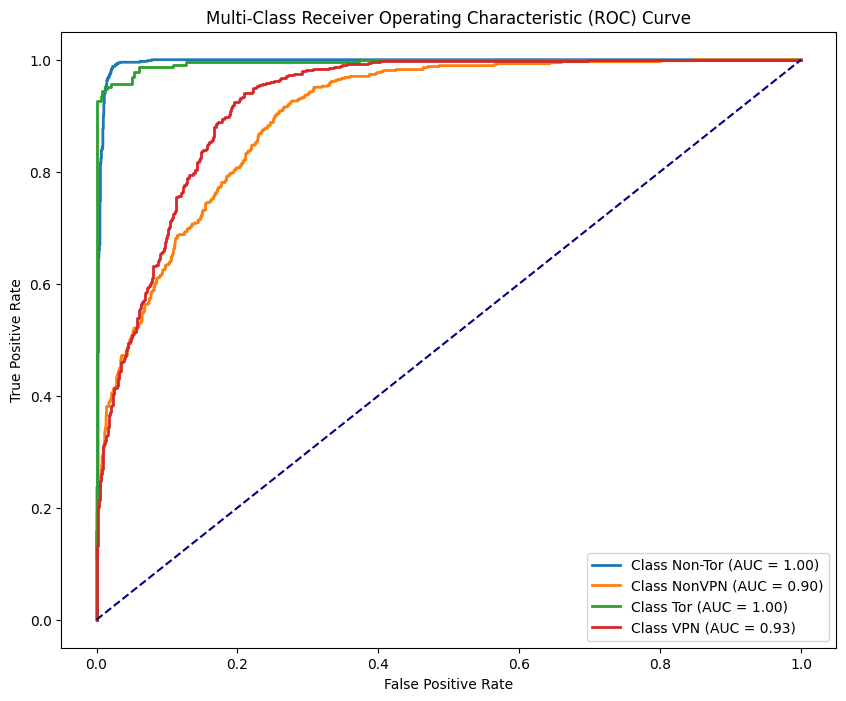

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=range(len(label_encoder.classes_)))
y_pred_bin = model.predict(X_test)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot ROC for random chance
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

# Plot formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


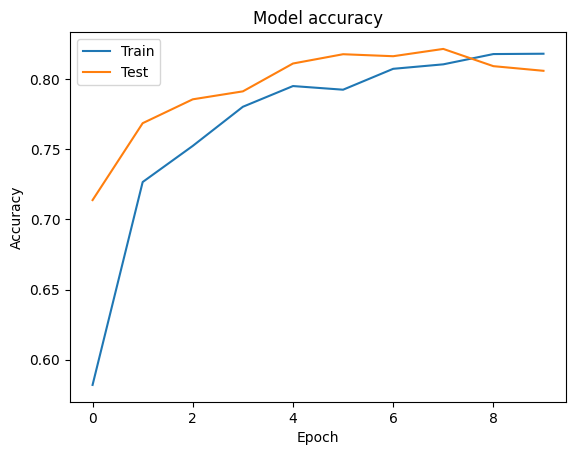

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
# Re-scaling and reshaping the entire dataset features for prediction
features_scaled = scaler.transform(features)
features_scaled = features_scaled.reshape(features_scaled.shape[0], features_scaled.shape[1], 1)

# Making predictions on the dataset
predictions = model.predict(features_scaled)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Adding a new column 'Predicted Label' to the original dataset
dataset['Predicted Label'] = predicted_labels

# Filtering out malicious entries
malicious_criteria = ['malicious_label']  # Replace 'malicious_label' with the actual label indicating malicious traffic
malicious_traffic = dataset[dataset['Predicted Label'].isin(malicious_criteria)]

# Saving the filtered malicious traffic to a new CSV file
malicious_output_file_path = 'Malicious_Traffic_Detected.csv'
malicious_traffic.to_csv(malicious_output_file_path, index=False)

print(f"Filtered malicious traffic saved to {malicious_output_file_path}")

331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Filtered malicious traffic saved to Malicious_Traffic_Detected.csv
